In [1]:
from boututils.datafile import DataFile
from boutdata.collect import collect
from boutdata.data import BoutData
import os, sys
import matplotlib
# matplotlib.use('Qt5Agg',force=True)
# matplotlib.use("TKAgg",force=True)
# matplotlib.use("widget",force=True)
import matplotlib.pyplot as plt
import xbout
import pandas as pd
import numpy as np
import pickle as pkl
import xarray as xr
import boutdata

from boutdata.restart import addvar
import glob
import shutil

import scipy

sys.path.append(r"/ssd_scratch/scripts/sdtools")


from hermes3.case_db import *
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *
from hermes3.utils import *
# from code_comparison.code_comparison import *


%load_ext autoreload
%autoreload 2

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [6]:
db = CaseDB(
    case_dir = r"/ssd_scratch/hcases",
    grid_dir = r"/ssd_scratch/hcases"
    )

In [7]:


toload = [ 
    # dict(name="nocx", id="xph8-6cb_nocx", unnormalise_geom = True, use_xhermes = True, squash = False), 
    # dict(name="nocxrec", id="xph9-nocxrec", unnormalise_geom = True, use_xhermes = True, squash = False), 
    # dict(name="neumanncore", id="xph9b-neumann_core_d", unnormalise_geom = True, use_xhermes = True, squash = False), 
    # dict(name="alldisabled", id="xph9c-no_neutbc_4.5eV", unnormalise_geom = True, use_xhermes = True, squash = False), 
    # dict(name="alldisabled_noseam", id="xph12a-noseam_alldisabled", unnormalise_geom = True, use_xhermes = True, squash = False), 
    # dict(name="only_noneutbc", id="xph6cc-also_no_neutbc", unnormalise_geom = True, use_xhermes = True, squash = False), 
    # dict(name="addrec", id="xph10a-9c_add_recomb", unnormalise_geom = True, use_xhermes = True, squash = False), 
    # dict(name="addrec_lortol", id="xph10ab-addrecomb_lortol", unnormalise_geom = True, use_xhermes = True, squash = False), 
    # dict(name="addrec_lofloor", id="xph10ac-lo_floor", unnormalise_geom = True, use_xhermes = True, squash = False), 
    # dict(name="addneutbc", id="xph10b-add_neutbc", unnormalise_geom = True, use_xhermes = True, squash = False), 
    # dict(name="removerec", id="xph10c-remove_rec", unnormalise_geom = True, use_xhermes = True, squash = False), 
    # dict(name="nopump_nocond", id="xph6cb-nopump-nocond", unnormalise_geom = True, use_xhermes = True, squash = False), 
    # dict(name="allbutrec", id="xph6cd-only_no_rec", unnormalise_geom = True, use_xhermes = True, squash = False), 
    # dict(name="upwind1stord", id="xph6ce-1stupwind", unnormalise_geom = True, use_xhermes = True, squash = False), 
    # dict(name="upwind1stord_lofloor", id="xph6ced-lofloor", unnormalise_geom = True, use_xhermes = True, squash = False), 
    # dict(name="upwind1stord_hist", id="xph6cf-1stupwind_historyrun", unnormalise_geom = True, use_xhermes = True, squash = False), 
    # dict(name="upwind1stord_2.0e19", id="xph6ce-1stupwind", unnormalise_geom = True, use_xhermes = True, squash = False), 
    # dict(name="upwind1stord_1.5e19", id="xph6ceb-1stupwind-1.5e19", unnormalise_geom = True, use_xhermes = True, squash = False), 
    # dict(name="upwind1stord_1.0e19", id="xph6cec-1stupwind-1.0e19", unnormalise_geom = True, use_xhermes = True, squash = False), 
    # dict(name="upwind1stord_losecondaryfloor", id="xph6cee-lo_secondaryfloor", unnormalise_geom = True, use_xhermes = True, squash = False), 
    
    # dict(name="upwind1stord", id="xph6ce-1stupwind", unnormalise_geom = True, use_xhermes = True, squash = False), 
    # dict(name="upwind1stord_noseam", id="xph11b-6ce_grid_noseam_allfields", unnormalise_geom = True, use_xhermes = True, squash = False), 
    
    # dict(name="newalldisabled", id="xph13a-alldisabled_nolax_novisc_nowallrecl_lofloor", unnormalise_geom = True, use_xhermes = True, squash = False), 
    # dict(name="newalldisabled_lopnfloor", id="xph13b-newalldisabled_lopnfloor", unnormalise_geom = True, use_xhermes = True, squash = False), 
    # dict(name="newalldisabled_flushnn", id="xph13bb-flush_nn", unnormalise_geom = True, use_xhermes = True, squash = False), 
    # dict(name="newalldisabled_losecondfloor", id="xph13bc-lo_secondaryfloor", unnormalise_geom = True, use_xhermes = True, squash = False), 
    
    dict(name="fixfloorbase", id="xph14-newalldisabled_lofloors", unnormalise_geom = True, use_xhermes = True, squash = False), 
    dict(name="fixfloorbase_addrec", id="xph14a-add_rec", unnormalise_geom = True, use_xhermes = True, squash = False), 
    
    # dict(name="fix_dnnnn", id="xph9cc-fix_dnnnn", unnormalise_geom = True, use_xhermes = True, squash = False), 
]
cs = {}
for case in toload:
    cs[case["name"]] = db.load_case_2D(case["id"], use_squash = case["squash"], verbose = True)


- Reading case xph14-newalldisabled_lofloors
-----------------------

Unnormalising with xHermes
- Reading case xph14a-add_rec
-----------------------

Unnormalising with xHermes


In [4]:
cs.keys()

dict_keys(['newalldisabled_flushnn'])

In [12]:
# ds = cs["newalldisabled_lopnfloor"].ds
# ds = cs["newalldisabled_flushnn"].ds
# ds = cs["newalldisabled_losecondfloor"].ds
# ds = cs["fix_dnnnn"].ds
# ds = cs["alldisabled"].ds
# ds = cs["upwind1stord_lofloor"].ds
ds = cs["fixfloorbase_addrec"].ds

# Field line histories

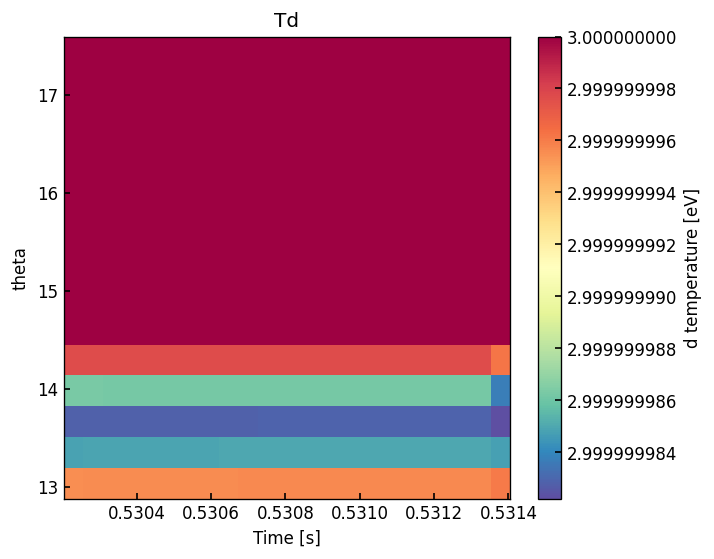

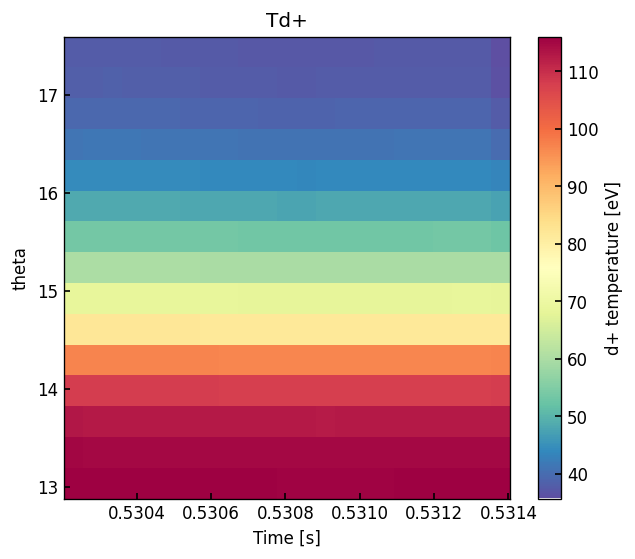

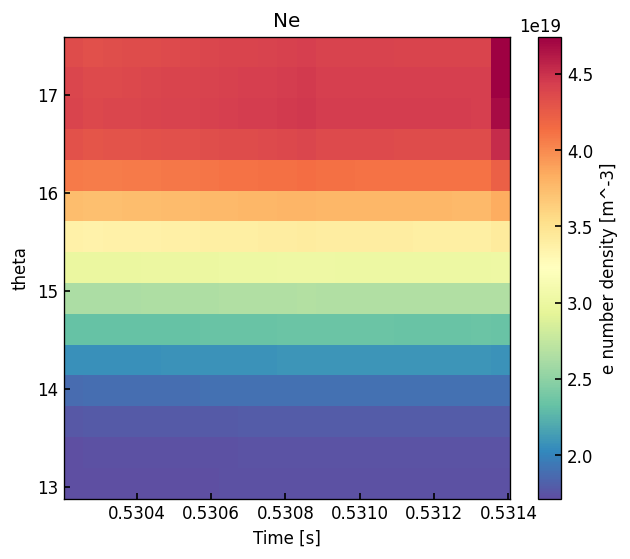

In [5]:

m = ds.metadata
fl = ds.isel(x = m["ixseps1"], theta = slice(41,-2))

for param in ["Td", "Td+", "Ne"]:
    fl[param].plot(cmap = "Spectral_r", linewidth = 0.0, color = "k", x = "t")
    plt.grid(False)
    plt.title(param)
    plt.show()

# Core history

In [38]:
cs.keys()

dict_keys(['addrec_lofloor'])

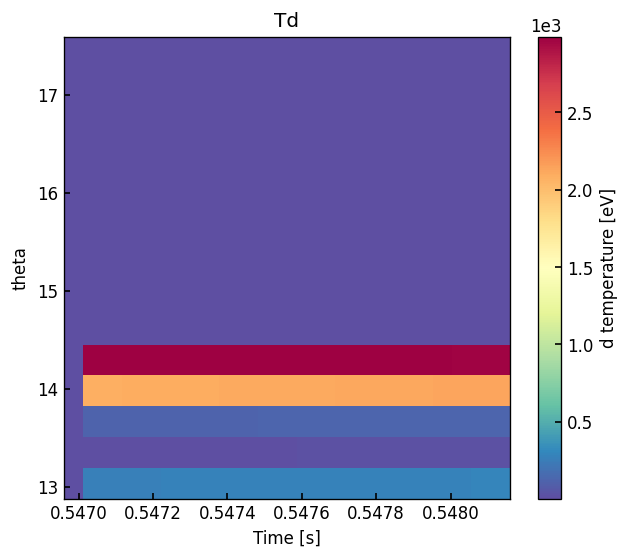

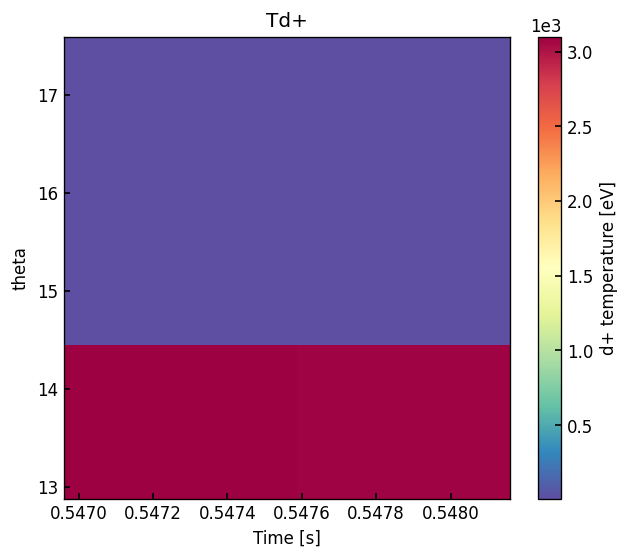

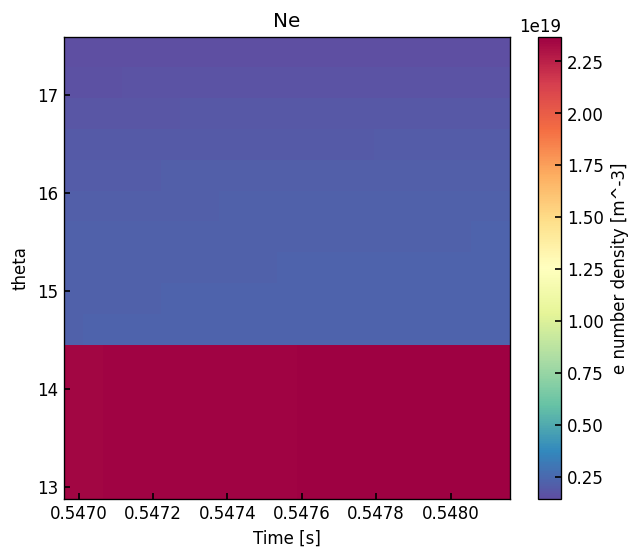

In [13]:

m = ds.metadata
fl = ds.isel(x = 2, theta = slice(41,-2))

for param in ["Td", "Td+", "Ne"]:
    fl[param].plot(cmap = "Spectral_r", linewidth = 0.0, color = "k", x = "t")
    plt.grid(False)
    plt.title(param)
    plt.show()

In [9]:
ds = cs["nopump_nocond"].ds
m = ds.metadata
fl = ds.isel(x = m["ixseps1"], theta = slice(41,-2))
fl["Ne"].plot(cmap = "Spectral_r", linewidth = 0.02, color = "k", x = "t")
plt.grid(False)

'x'

In [4]:
ds = calculate_radial_fluxes(ds)
ds = calculate_target_fluxes(ds)

NameError: name 'ds' is not defined

## Core parameters

### Core loop

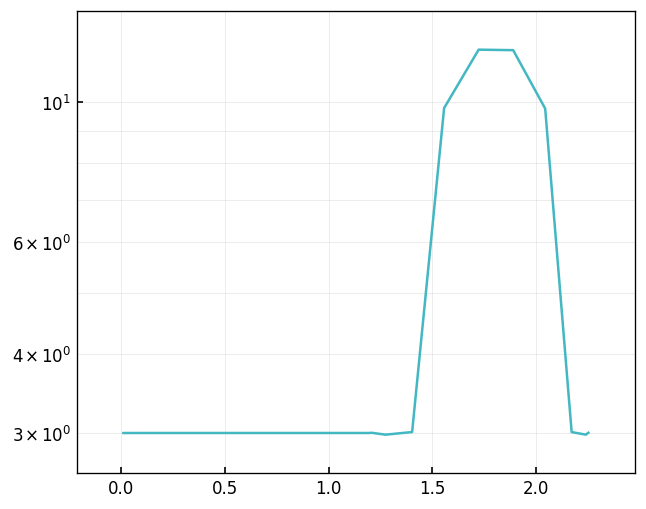

In [6]:
ds = cs["newalldisabled_flushnn"].ds.isel(t=-1)
fl = ds.hermesm.select_region("core_edge").squeeze()

fig, ax = plt.subplots()

x = fl["dl"].cumsum()

ax.plot(x, fl["Td"])

ax.set_yscale("log")

# ax2 = ax.twinx()
# (fl["Pd"] / (1e17 * 1200 * constants("q_e"))).plot(ax = ax2, c = "r")
# ax2.set_yscale("log")



### OMP

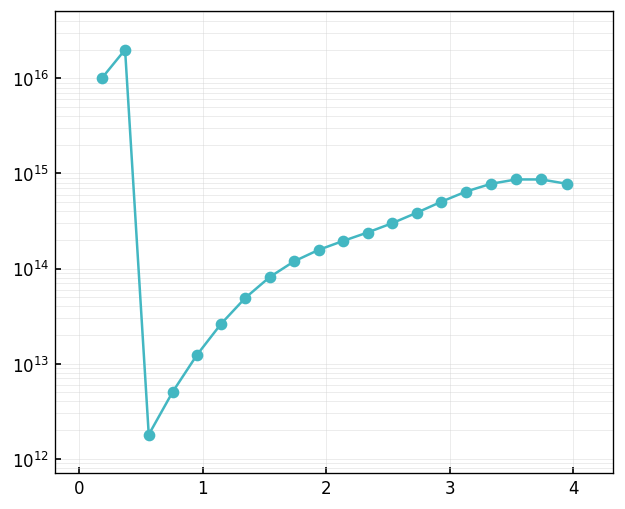

In [6]:
ds = cs["newalldisabled_flushnn"].ds.isel(t=-1)
fl = ds.hermesm.select_region("outer_midplane_a").squeeze()

fig, ax = plt.subplots()

x = fl["dl"].cumsum()

ax.plot(x, fl["Nd"], marker = "o")

ax.set_yscale("log")

# ax2 = ax.twinx()
# (fl["Pd"] / (1e17 * 1200 * constants("q_e"))).plot(ax = ax2, c = "r")
# ax2.set_yscale("log")



# State of Td

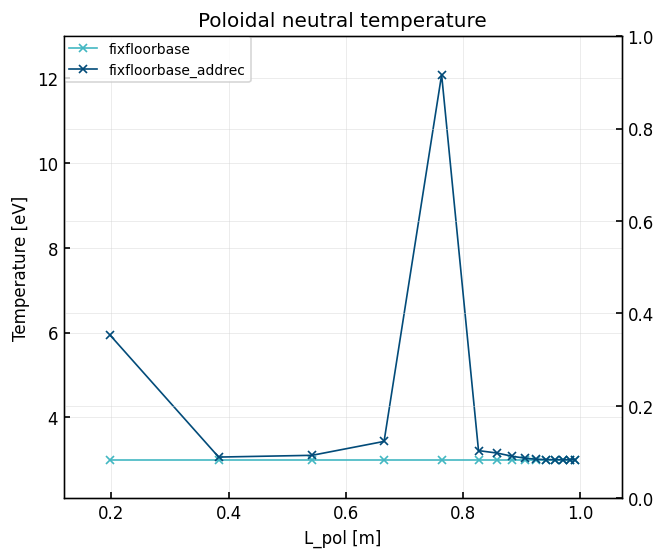

In [8]:

# colors = mpl.cm.get_cmap("plasma", len(cases))(range(len(cases)))
fig, ax = plt.subplots(dpi = 120)

cases = cs.keys()

ax2 = ax.twinx()

# colors = ["teal", "darkorange", "firebrick"]

for i, case in enumerate(cases):
    ds = cs[case].ds.isel(t=-1)
    m = ds.metadata
    fl = ds.isel(x = m["ixseps1"], theta = slice(41,-2))
    dist = np.cumsum(fl["dl"])
    
    if any([x in case for x in ["form2", "form4"]]):
        marker = "x"
    elif any([x in case for x in ["form1", "form3"]]):
        marker = "+"
    else:
        marker = "x"
    ax.plot(dist, fl["Td"], label = case, marker = marker, ms = 5, lw = 1, 
            # color = colors[i]
            )
    
    # try:
    # try:
    #     ax2.plot(dist, fl["Sd+_rec"], label = case, marker = marker, ms = 5, lw = 1)
    # except:
    #     pass
                # color = colors[i])
# ax.plot(dist, fl["Td+"],  marker = "o", ms = 5, lw = 0.5, c = colors[i])
# ax.set_yscale("symlog", linthresh = 1e-3)
ax.set_xlabel("L_pol [m]")
ax.set_ylabel("Temperature [eV]")
ax.set_title("Poloidal neutral temperature")
ax.legend(fontsize="small")
# ax.set_ylim(0,200)

In [6]:
%matplotlib widget


In [ ]:
plt.close("all")
fig, ax = plt.subplots()
ax.set_ylim(-0.85, 0.2)
ax.set_xlim(0.15,0.75)
ds = cs["addrec"].ds
xbout.plotting.animate.animate_poloidal(ds["Td"].hermesm.clean_guards(), ax = ax, 
                                        cmap = "Spectral_r",
                                        linewidth = 0.1,
                                        logscale = True)
                                        
                                        

In [11]:
plt.close("all")
%matplotlib inline

In [20]:
50 * 1.2

60.0

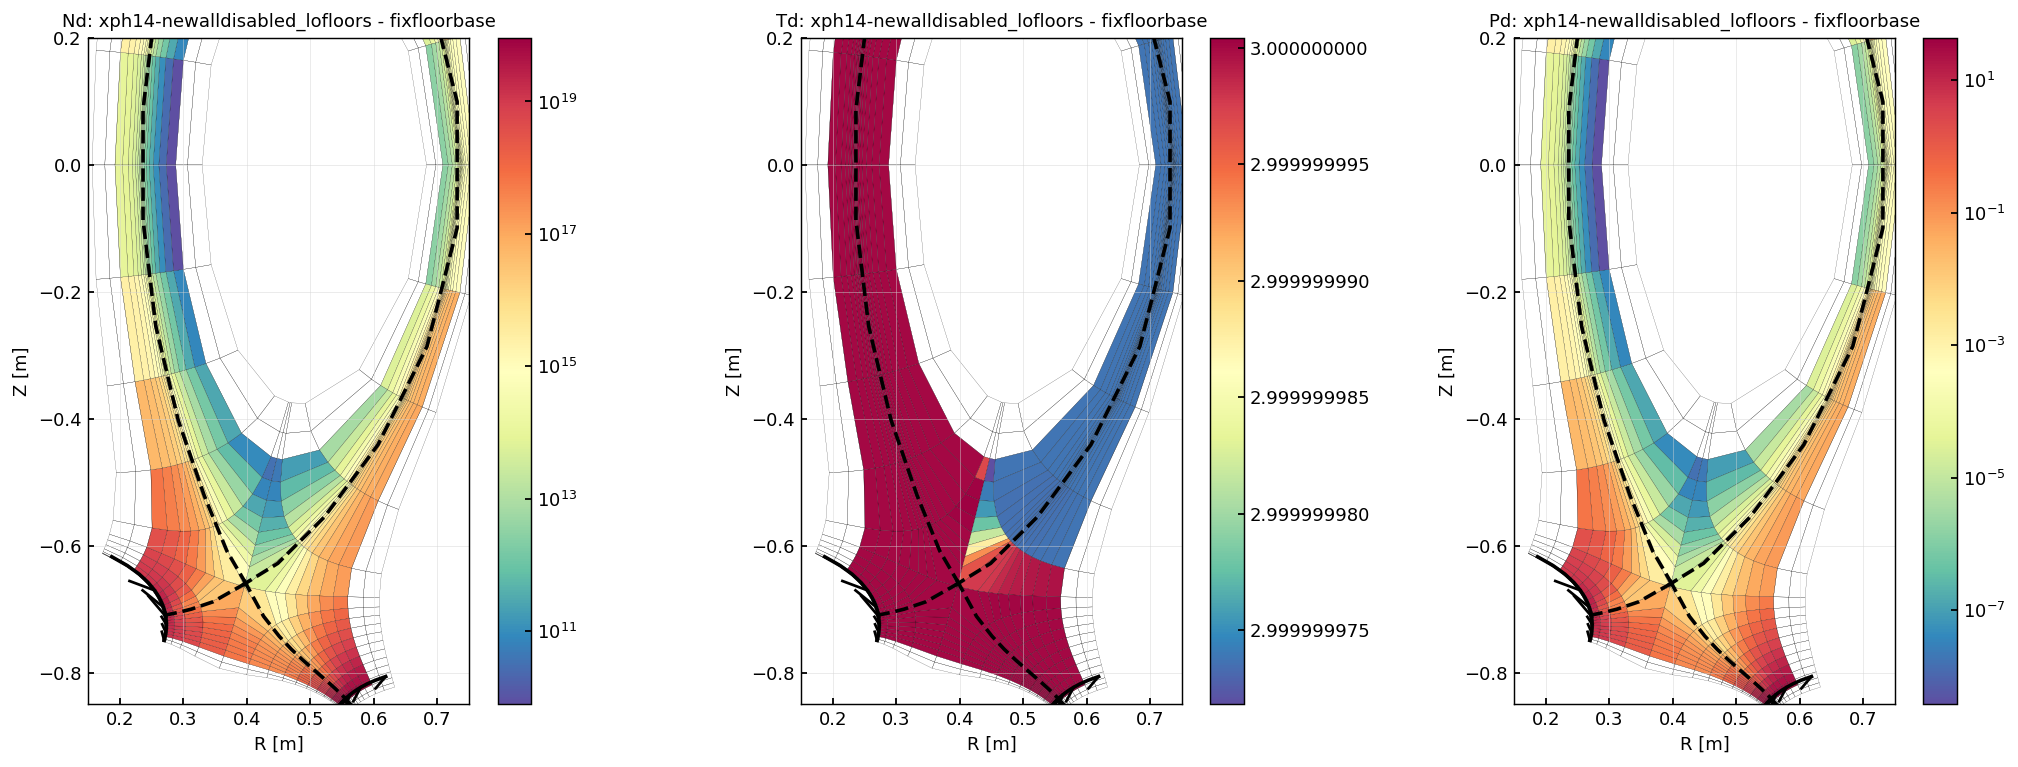

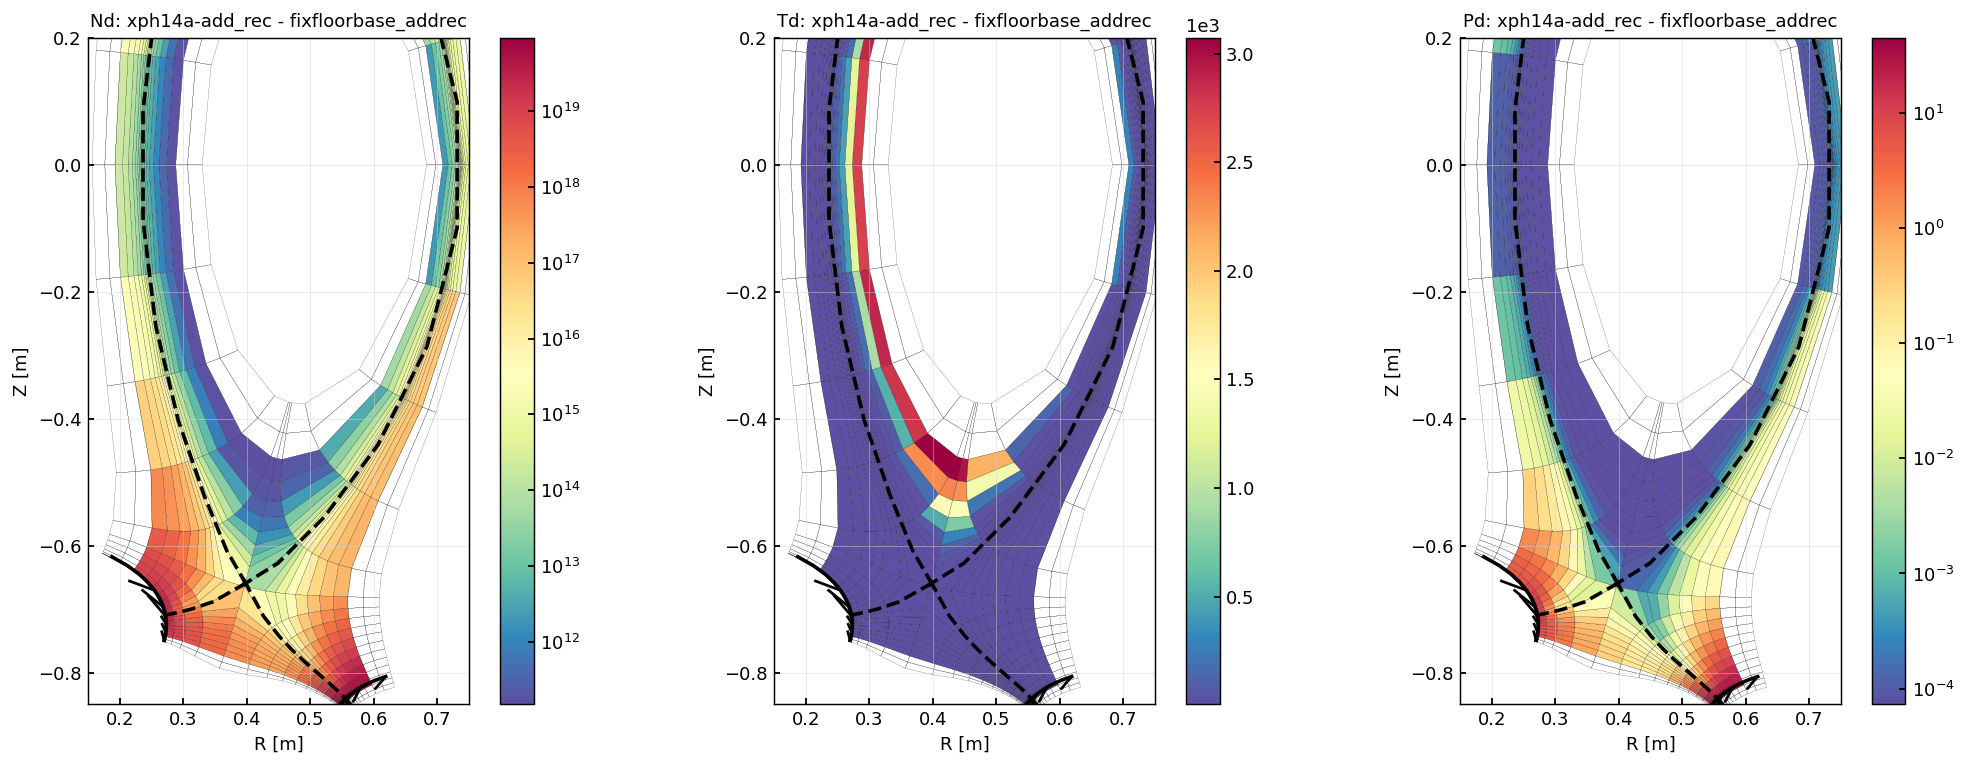

In [9]:
clean_guards = True

for entry in toload:
    case = entry["name"]
    fig, axes = plt.subplots(1,3, figsize = (16,6), dpi = 130)
    newds = cs[case].ds.isel(t=-1)
    
    ax = axes[0]
    data = (newds["Nd"])
    if clean_guards:
        data = data.hermesm.clean_guards()
    data.bout.polygon(ax, cmap = "Spectral_r", 
                                        # vmax = 25, vmin = 300, 
                                        antialias = True, linewidth = 0.1, logscale = True)
    ax.set_ylim(-0.85, 0.2)
    ax.set_xlim(0.15,0.75)
    ax.set_title(f"Nd: {entry['id']} - {entry['name']}", fontsize = "medium")
    
    
    ax = axes[1]
    data = (newds["Td"])
    if clean_guards:
        data = data.hermesm.clean_guards()
    data.bout.polygon(ax, cmap = "Spectral_r", 
                                        # vmax = 25, vmin = 300, 
                                        antialias = True, linewidth = 0.1, logscale = False)
    ax.set_ylim(-0.85, 0.2)
    ax.set_xlim(0.15,0.75)
    ax.set_title(f"Td: {entry['id']} - {entry['name']}", fontsize = "medium")
    
    
    ax = axes[2]
    data = (newds["Pd"])
    if clean_guards:
        data = data.hermesm.clean_guards()
    data.bout.polygon(ax, cmap = "Spectral_r", 
                                        # vmax = 25, vmin = 300, 
                                        antialias = True, linewidth = 0.1, logscale = True)
    ax.set_ylim(-0.85, 0.2)
    ax.set_xlim(0.15,0.75)
    ax.set_title(f"Pd: {entry['id']} - {entry['name']}", fontsize = "medium")
    
    fig.tight_layout()


In [22]:
cs.keys()

dict_keys(['newalldisabled_lopnfloor'])

In [31]:
def get_floors(ds):
    o = ds.options["d"]
    
    if "nn_floor" in o.keys():
        nn_floor = o["nn_floor"]
    else:
        nn_floor = 1e-5
    
    if "pn_floor" in o.keys():
        pn_floor = o["pn_floor"]
    else:
        pn_floor = 1e-5
        
    Nnorm = ds.metadata["Nnorm"]
    Tnorm = ds.metadata["Tnorm"]
    Pnorm = Nnorm * Tnorm * constants("q_e")
        
    nn_floor_si = nn_floor * Nnorm
    pn_floor_si = nn_floor * Pnorm
        
    return {"nn_floor" : nn_floor, "pn_floor" : pn_floor, "nn_floor_si" : nn_floor_si, "pn_floor_si" : pn_floor_si}    
    
floors = get_floors(ds)
nn_floor = floors["nn_floor"]
pn_floor = floors["pn_floor"]

In [26]:
ds.options["hermes"].keys()

['components',
 'Nnorm',
 'Bnorm',
 'Tnorm',
 'qe',
 'Mp',
 'Cs0',
 'Omega_ci',
 'rho_s0']

In [18]:
pn_min = (ds["Pd"]/ds["Pd"].attrs["conversion"]).hermesm.clean_guards().min(["x", "theta"]).values
print(pn_min)
print(floors["pn_floor"])

pn_min_si = (ds["Pd"]).hermesm.clean_guards().min(["x", "theta"]).values
print(pn_min_si)
print(floors["pn_floor_si"])

print(pn_min_si / pn_min)
print(floors["pn_floor_si"] / floors["pn_floor"])
print(ds.metadata["Nnorm"] * ds.metadata["Tnorm"] * constants("q_e"))

9.85949704116278e-10
1e-10
1.895598693881177e-08
1.9226119440000003e-07
19.226119607999998
1922.6119440000002
19.22611944


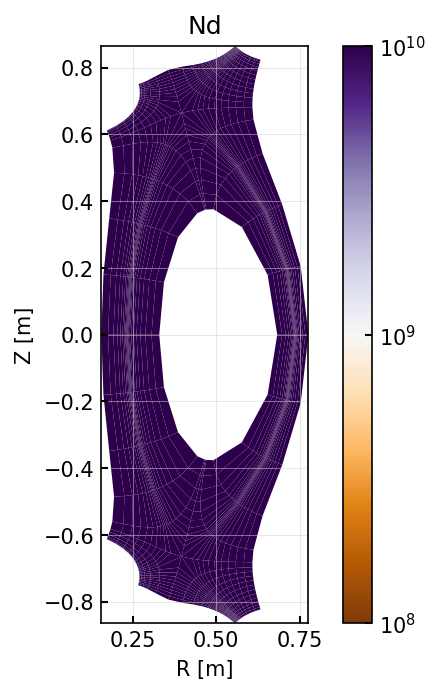

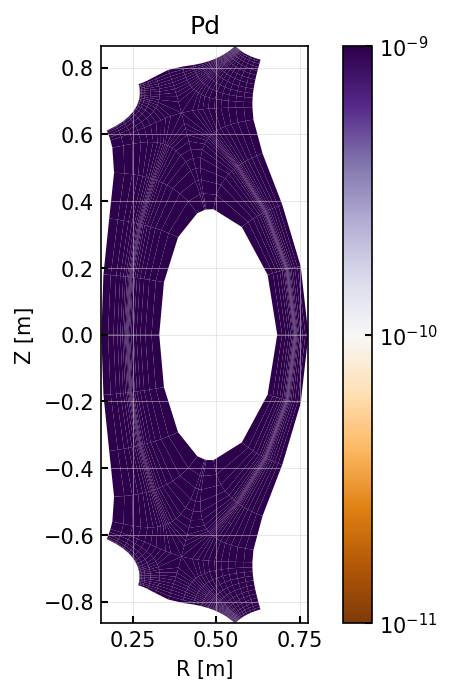

In [10]:
# ds = cs["newalldisabled_lopnfloor"].ds.isel(t=-1)
for case in cs:
    ds = cs[case].ds.isel(t=-1)
    # cmap = mpl.colors.LinearSegmentedColormap.from_list("custom", ["darkorange", "white", "navy"], N=3)
    cmap = "PuOr"

    floors = ds.hermesm.get_floors()
    nn_floor_si = floors["nn_floor_si"]
    pn_floor_si = floors["pn_floor_si"]

    fig, ax = plt.subplots(dpi = 150)
    (ds["Nd"]).bout.polygon(ax = ax, cmap = cmap, targets = False, 
                                                        separatrix_kwargs = dict(color="white", linestyle = "-", linewidth = 0),
                                                        antialias = True,
                                                        logscale = True,
                                                        vmin = nn_floor_si*1e-1,
                                                        vmax = nn_floor_si*1e1)
    # ax.set_ylim(-0.9, 0)

    fig, ax = plt.subplots(dpi = 150)
    data = ds["Pd"]/ds["Pd"].attrs["conversion"]
    data.bout.polygon(ax = ax, cmap = cmap, targets = False, 
                                                        separatrix_kwargs = dict(color="white", linestyle = "-", linewidth = 0),
                                                        antialias = True,
                                                        logscale = True,
                                                        vmin = floors["pn_floor"]*1e-1,
                                                        vmax = floors["pn_floor"]*1e1)
    # ax.set_ylim(-0.9, 0)

# Animate

In [16]:
cs.keys()

dict_keys(['newalldisabled_flushnn'])

In [8]:
%matplotlib widget

In [10]:
%matplotlib inline

(0.15, 0.75)

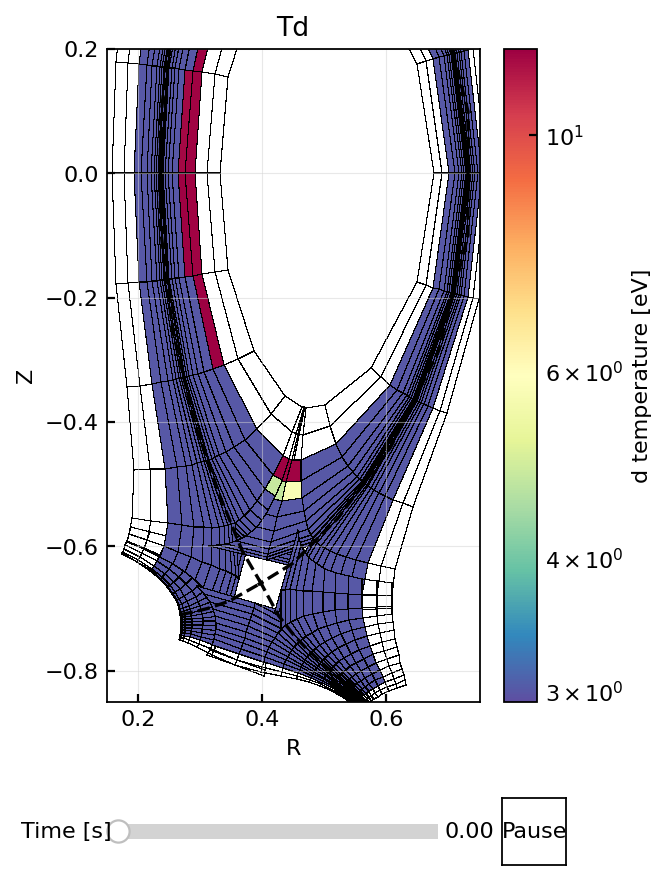

In [9]:
plt.close("all")
fig, ax = plt.subplots( figsize = (4,6), dpi = 160)
newds = cs["newalldisabled_flushnn"].ds

anim = xbout.plotting.animate.animate_poloidal(newds["Td"].hermesm.clean_guards(), ax = ax, targets = False, linewidth = 0.01, color = "k", logscale = True, cmap = "Spectral_r")
ax.set_ylim(-0.85, 0.2)
ax.set_xlim(0.15,0.75)

# History of max Tn, min Pn, min Nn

In [36]:
cs.keys()

dict_keys(['upwind1stord_lofloor'])

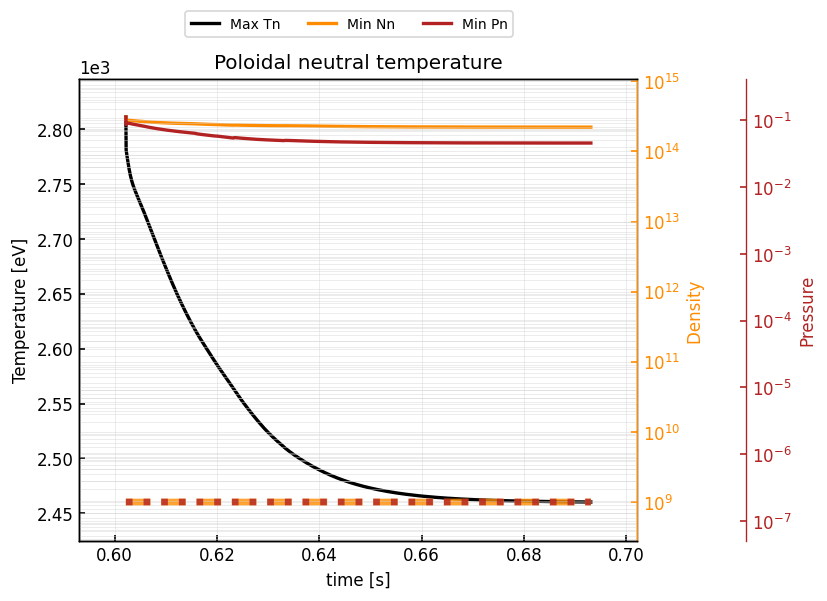

In [37]:

colors = ["teal", "darkorange", "firebrick", "navy", "limegreen", "purple", "skyblue", "red"]


# colors = mpl.cm.get_cmap("plasma", len(cases))(range(len(cases)))
fig, ax = plt.subplots(dpi = 120)

ds = cs["upwind1stord_lofloor"].ds
m = ds.metadata
floors = ds.hermesm.get_floors()

ax.plot(ds["t"], ds["Td"].hermesm.clean_guards().max(["x", "theta"]), label = "Max Tn", marker = "x", ms = 0, lw = 2, color = "k")

# ax.set_yscale("symlog", linthresh = 1e-3)
# ax.set_yscale("log")
ax.set_xlabel("time [s]")
ax.set_ylabel("Temperature [eV]")
ax.set_title("Poloidal neutral temperature")

ax2 = ax.twinx()
ax2color = "darkorange"
ax2.plot(ds["t"], ds["Nd"].hermesm.clean_guards().min(["x", "theta"]), label = "Min Nn", c = ax2color, marker = "x", ms = 0, lw = 2)
ax2.set_yscale("log")
# ax2.set_ylim(1e14,3e17)
ax2.set_ylabel("Density ", color = ax2color)
ax2.spines["right"].set_color(ax2color)
ax2.tick_params(axis = "y", colors = ax2color)
ax2.plot(ds["t"], np.ones_like(ds["t"])*floors["nn_floor_si"], c = ax2color, ls = "--", zorder = 100, lw = 4, alpha = 0.8)

ax3 = ax.twinx()
ax3color = "firebrick"
ax3.plot(ds["t"], ds["Pd"].hermesm.clean_guards().min(["x", "theta"]), label = "Min Pn", c = ax3color, marker = "x", ms = 0, lw = 2)
ax3.set_yscale("log")
# ax3.set_ylim(0.0001,10)
ax3.set_ylabel("Pressure", color = ax3color)
ax3.spines["right"].set_color(ax3color)
ax3.spines["right"].set_position(("outward", 65))
ax3.tick_params(axis = "y", colors = ax3color)
ax3.plot(ds["t"], np.ones_like(ds["t"])*floors["pn_floor_si"], c = ax3color, ls = ":", zorder = 100, lw = 4, alpha = 0.8)


fig.legend(loc = "lower center", bbox_to_anchor = (0.5, 0.95), ncols = 4, fontsize="small")
ax.grid(which = "minor", visible = False)
# ax.set_yscale("log")
# ax.set_ylim(10,10000)

In [45]:
floors

{'nn_floor': 1e-08,
 'pn_floor': 1e-10,
 'nn_floor_si': 1000000000.0,
 'pn_floor_si': 1.9226119440000003e-07}

In [48]:
ds["Pd"].hermesm.clean_guards().min(["x", "theta"]).values

array(1.89559869e-08)

In [49]:
(ds["Pd"]/ds["Pd"].attrs["conversion"]).hermesm.clean_guards().min(["x", "theta"]).values

array(9.85949704e-10)

In [52]:
ds.metadata["Nnorm"] * ds.metadata["Tnorm"] * constants("q_e")

19.22611944

In [53]:
ds.metadata["Pnorm"]

19.22611944

In [51]:
ds["Pd"].attrs["conversion"]

19.226119607999998

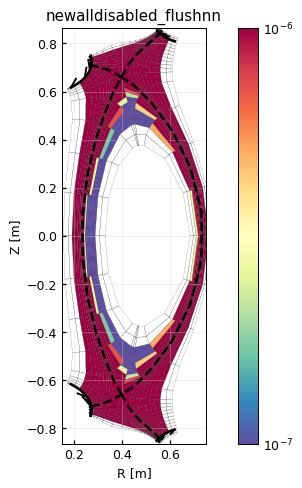

In [56]:


for name in cs:

    fig, ax = plt.subplots(figsize = (9,6), dpi = 90)
    ds = cs[name].ds.isel(t=-1)
    
    abs(ds["Pd"]).hermesm.clean_guards().bout.polygon(ax, cmap = "Spectral_r", 
                                        vmax = 1e-6, vmin = 1e-7, 
                                        antialias = True, linewidth = 0.1, logscale = True)

    # ax.set_ylim(-0.85, 0.2)
    ax.set_xlim(0.15,0.75)
    ax.set_title(name)


## Compare to base

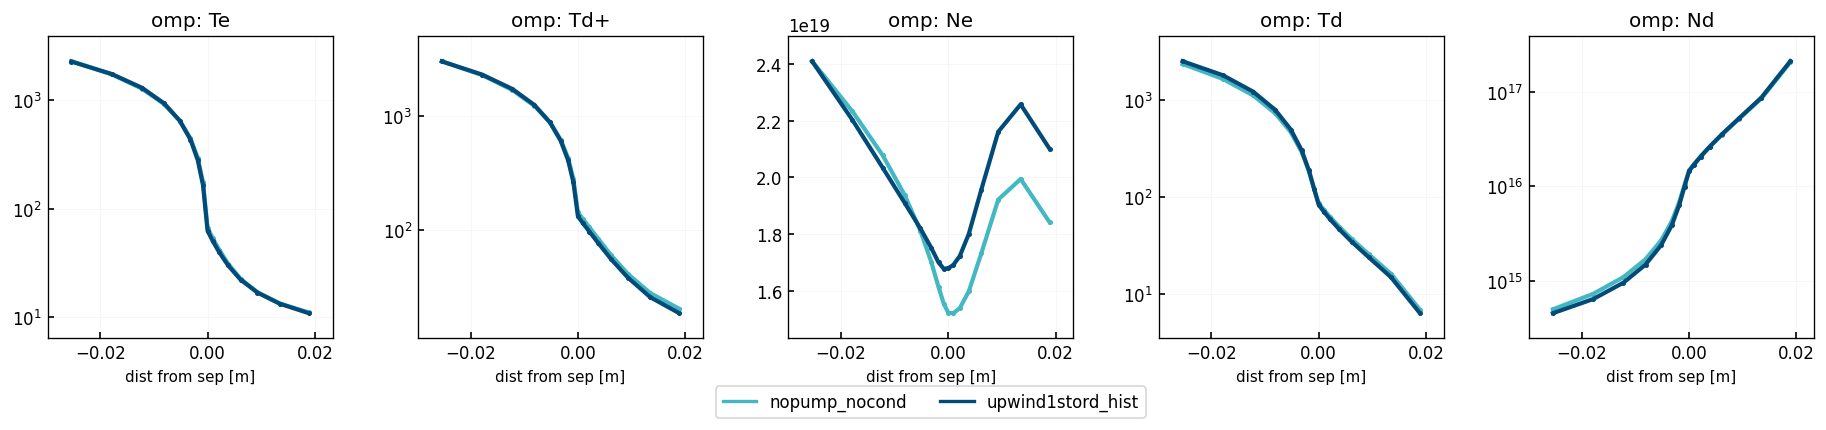

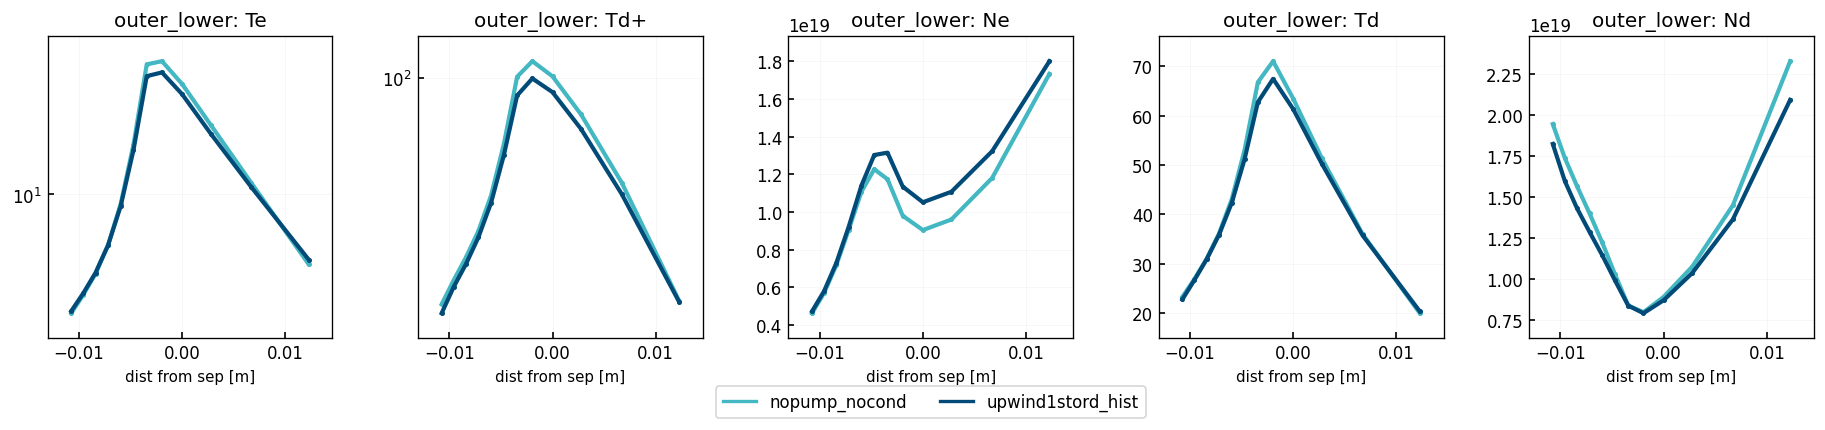

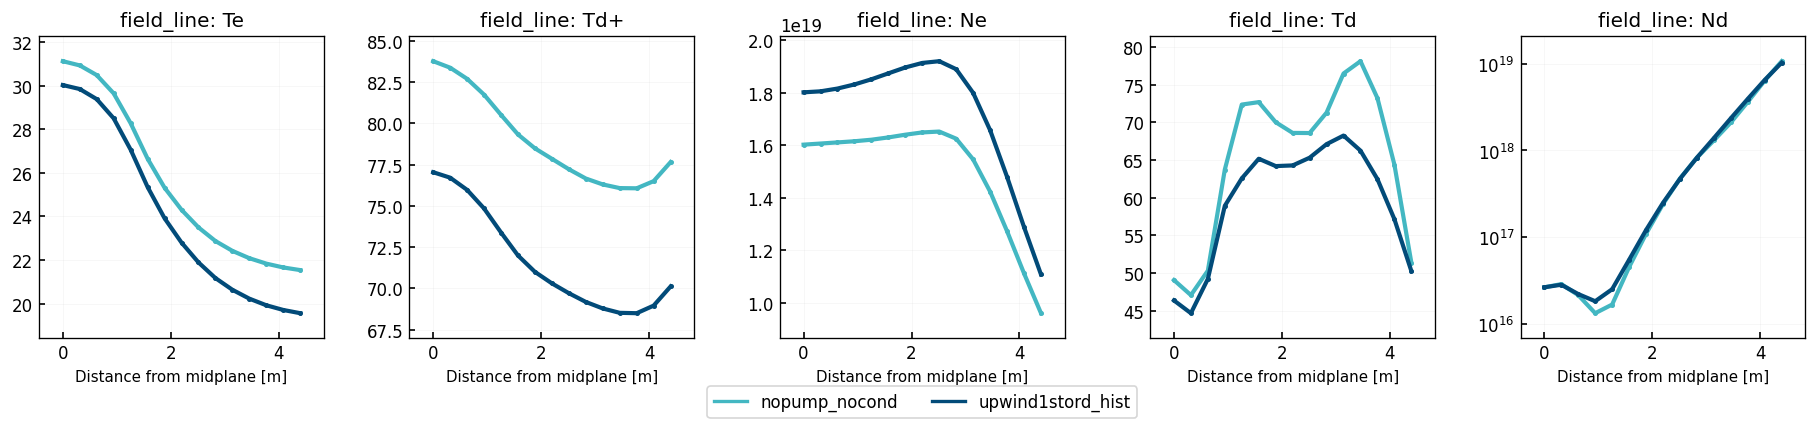

In [9]:
toplot = {}
for case in cs:
    toplot[case] = cs[case].ds.isel(t=-1, x = slice(2,-2))
    
lineplot(
    toplot,
    clean_guards = False,
    logscale = True,
    params = ["Te", "Td+", "Ne", "Td", "Nd"],
    regions = ["omp", "outer_lower", "field_line"],
)

# COnvergence

In [13]:
cs.keys()

dict_keys(['newalldisabled_flushnn'])

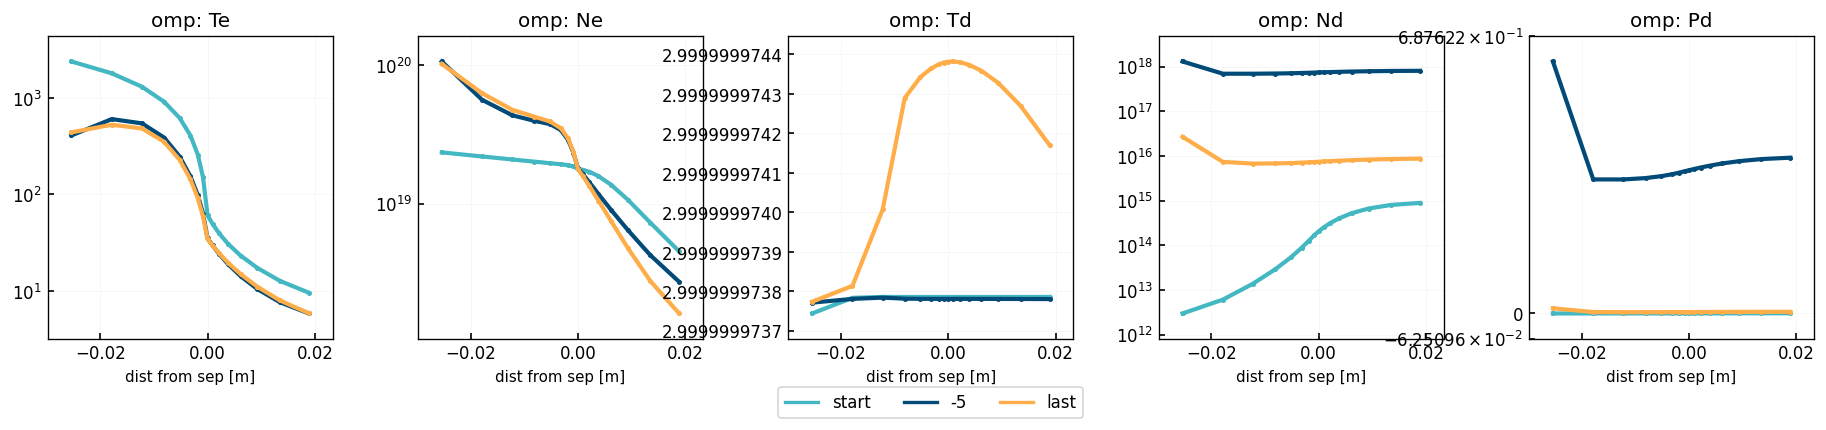

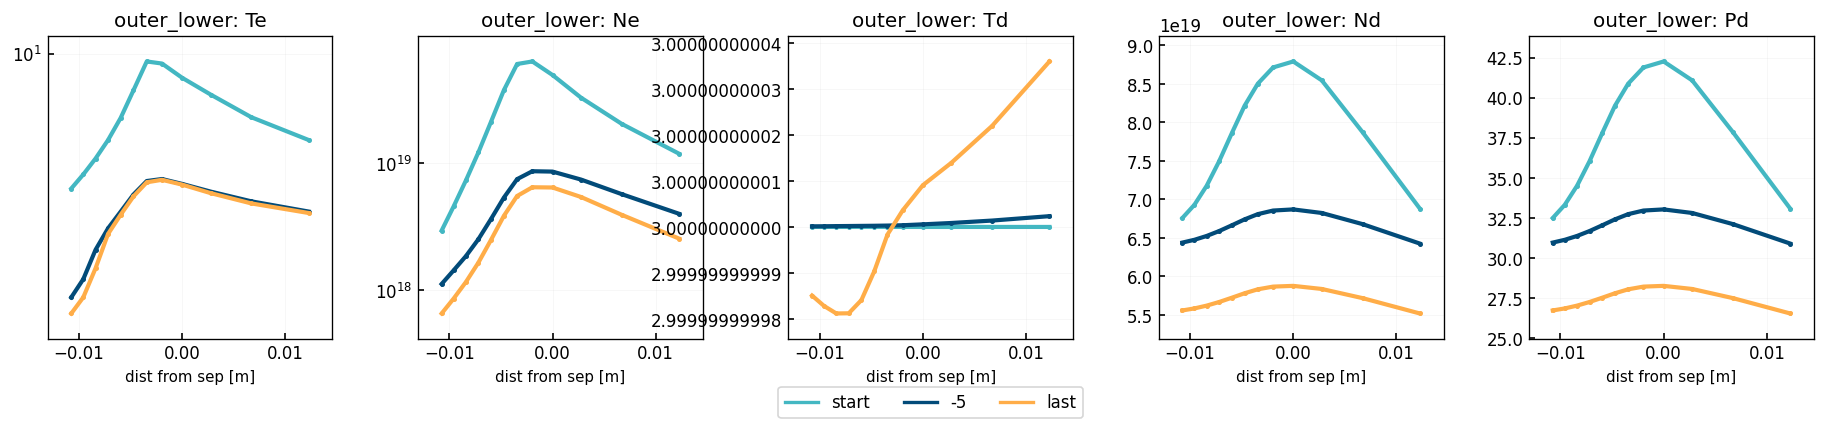

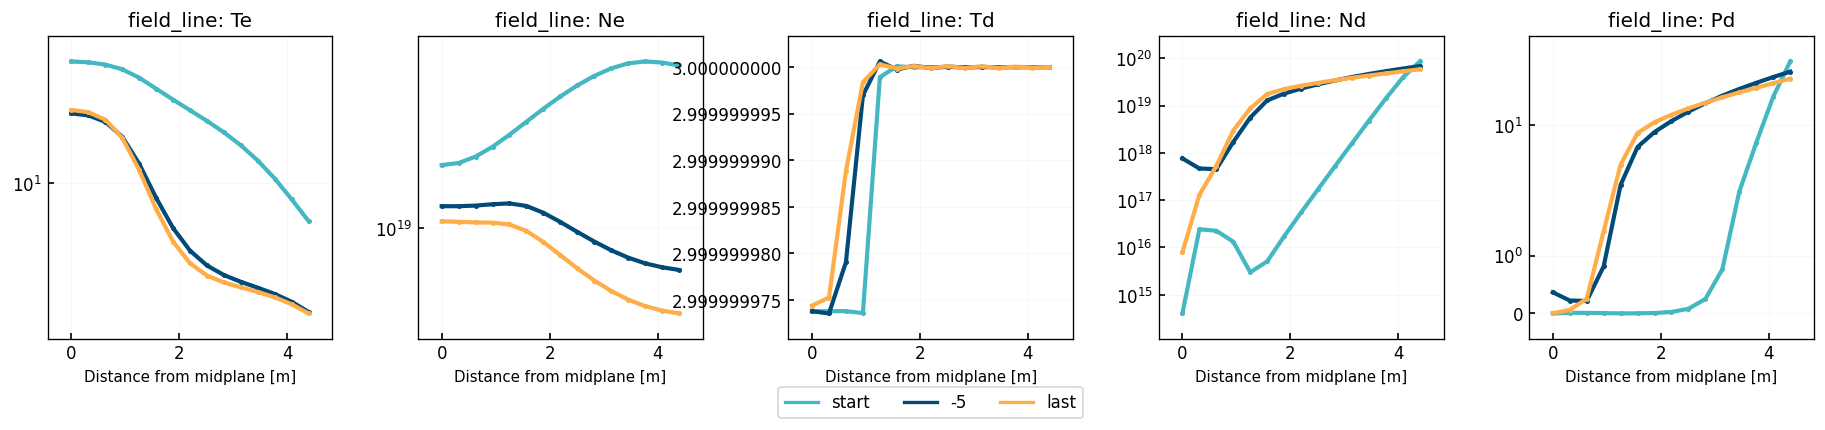

In [15]:
case = "newalldisabled_flushnn"
lineplot(
    {
        "start":cs[case].ds.isel(t=0, x = slice(2,-2)),
        "-5":cs[case].ds.isel(t=-3, x = slice(2,-2)),
        "last":cs[case].ds.isel(t=-1, x = slice(2,-2)),
        # "base":cs["base"].ds.isel(t=-1, x = slice(2,-2)),

    },
    clean_guards = False,
    params = ["Te", "Ne", "Td", "Nd", "Pd"],
    regions = ["omp", "outer_lower", "field_line"],
)

In [28]:
y_omp

40

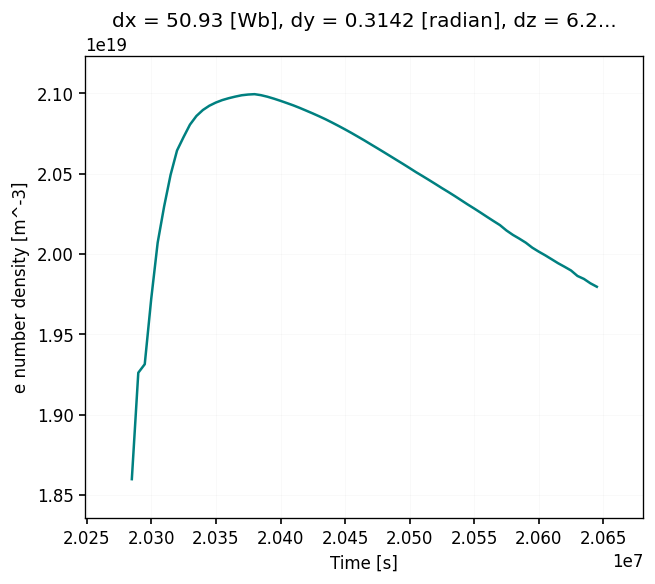

In [4]:
ds = cs["afn"].ds
m = ds.metadata

j2_2g = m["jyseps2_2"] + m["MYG"] * 3
j1_2g = m["jyseps1_2"] + m["MYG"] * 3
y_omp = int((j2_2g - j1_2g) / 2) + j1_2g
x_sep = m["ixseps1"]

x_sep

ds["Ne"].isel(x = x_sep, theta = y_omp).plot()

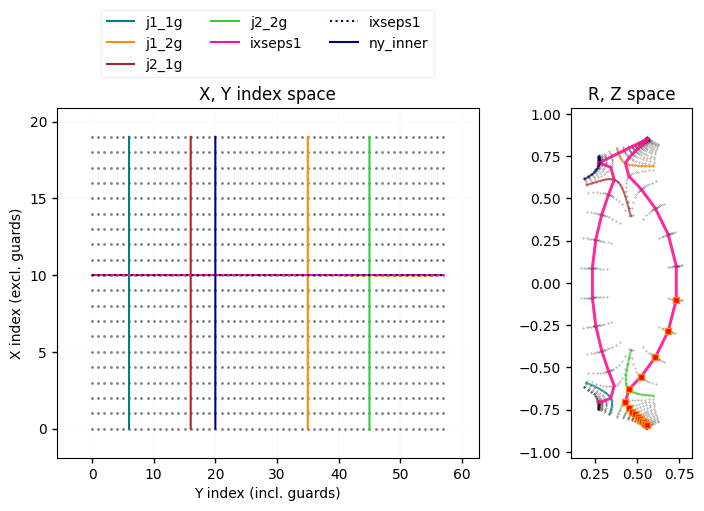

In [15]:
ds = cs["test"].ds.isel(t=-1)
m = ds.metadata

fl = ds.isel(x = m["ixseps1"], theta = slice(41,-2))
plot_selection(ds, fl)

(0.15, 0.75)

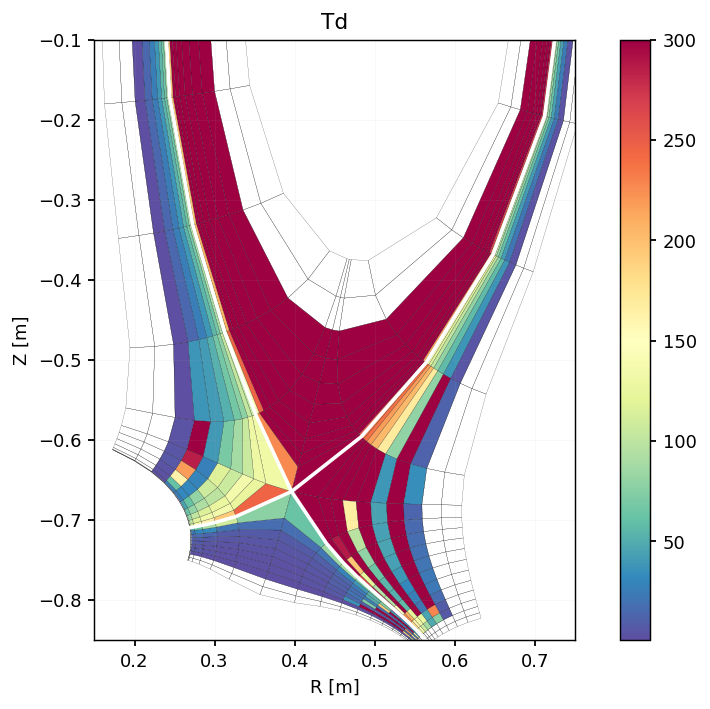

In [9]:

fig, ax = plt.subplots(figsize = (9,6), dpi = 130)
ds = cs["base_nocond"].ds.isel(t=-1)
(ds["Td"]).hermesm.clean_guards().bout.polygon(ax, cmap = "Spectral_r", vmax = 300, vmin = None, antialias = True, linewidth = 0.1, logscale = False)
ax.set_ylim(-0.85, -0.1)
ax.set_xlim(0.15,0.75)


In [14]:
cs.keys()

dict_keys(['neumanncore'])

In [22]:
cs.keys()

dict_keys(['noneutbc'])

(0.15, 0.75)

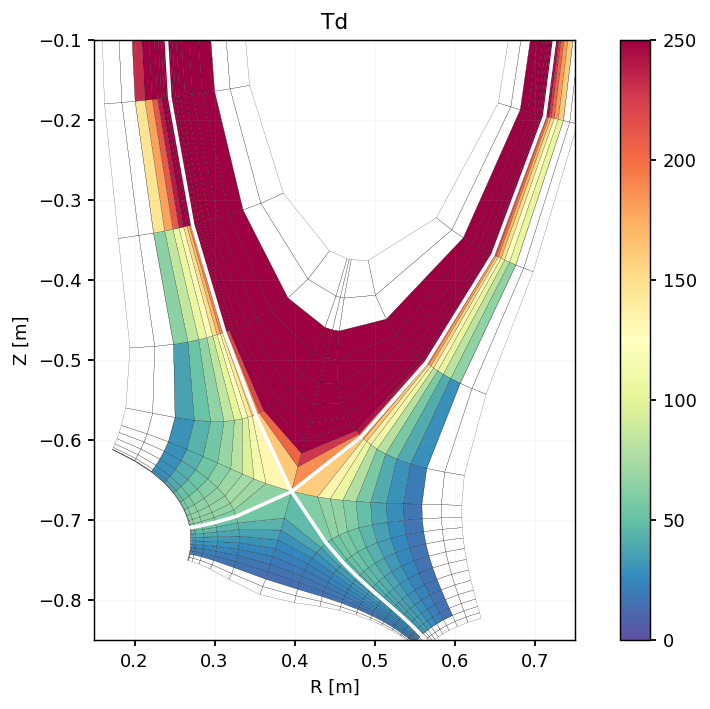

In [5]:

fig, ax = plt.subplots(figsize = (9,6), dpi = 130)
ds = cs["test"].ds.isel(t=-1)
ds["Td"].hermesm.clean_guards().bout.polygon(ax, cmap = "Spectral_r", vmax = 250, vmin = 0, antialias = True, linewidth = 0.1)
ax.set_ylim(-0.85, -0.1)
ax.set_xlim(0.15,0.75)
